# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: |Kushal |Doshi |Kushal Manish Doshi,2024-11-29    |20|25%|
| Member 2: |Shubham|Patel |Shubham Narendra Patel,2024-11-29 |20|25%|
| Member 3: |Sylvia |Bruce |Sylvia Araba Bruce,2024-11-29     |20|25%|
| Member 4: |Tvisha |Pandya|Tvisha Hasit Pandya,2024-11-29    |20|25%|


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [3]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [5]:
# TODO: Display first two rows of cv_set
# (1 mark)
cv_set.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187,rest
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144,rest


In [6]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [7]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [8]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [9]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [10]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [12]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [13]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [14]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf'],
    'scaler': [StandardScaler(), RobustScaler(), None]
}

In [15]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [16]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
best_cv_test_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("Best cross-validation validation score: {:.2f}".format(best_cv_test_score))
test_set_accuracy = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

Confusion Matrix:


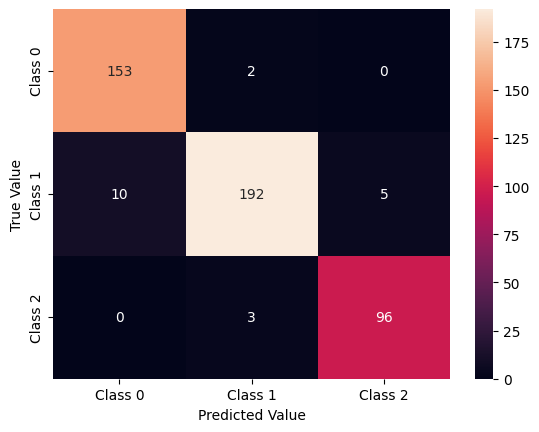


Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [18]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The training score of model is 0.95 also validation score is 0.95. Thus this indicates that model is well generalized. Also F1 score and recall are near match wihch shows good generalization.

2.  The hyperparameters C and gamma are suitable for this model as the interval between trainning score and validation is zero, so these hyperparameters are suitable.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [19]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [20]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
from sklearn.metrics import accuracy_score
y1_pred = grid.predict(X1)
y2_pred = grid.predict(X2)
test_set1_accuracy = accuracy_score(y1, y1_pred)
test_set2_accuracy = accuracy_score(y2, y2_pred)
print("test_set1 score: {:.2f}".format(test_set1_accuracy))
print("test_set2 score: {:.2f}".format(test_set2_accuracy))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion Matrix:


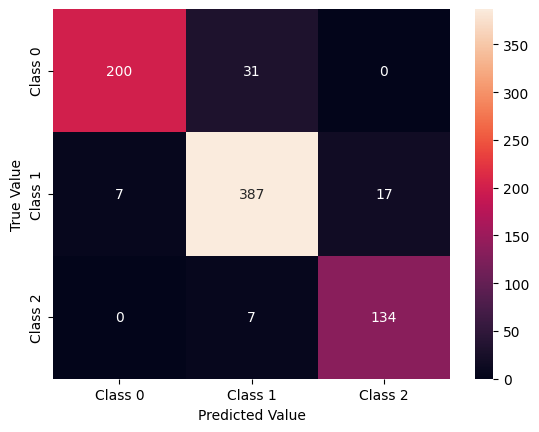


Classification Report:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [21]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y1, grid.predict(X1))
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y1, grid.predict(X1)))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion Matrix:


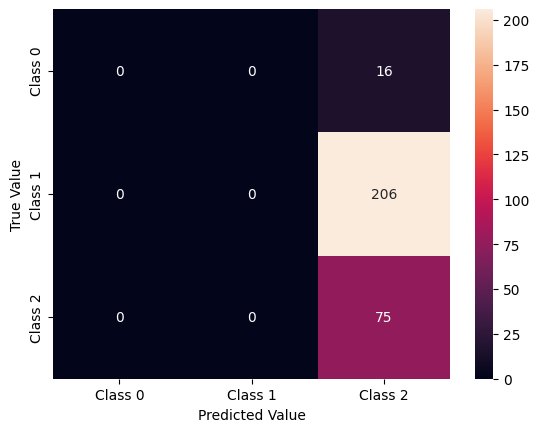


Classification Report:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y2, grid.predict(X2))
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y2, grid.predict(X2)))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. If one dataset is more represntative like test set 1, we can get better score i.e. 0.95 but for test set 2 we are not getting better score, so there might be lack of generalization in this model. For performance difference, this an example of uneven distribution of data set.

2. The hyperparameter tuning is one of the potential cause. Because if the model is not trained specially under specific characteristics, it might not perform optimally to all data sets.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [23]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [24]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [25]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1]
}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [26]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
best_cv_test_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("Best cross-validation validation score: {:.2f}".format(best_cv_test_score))
test_set_accuracy = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

Confusion Matrix:


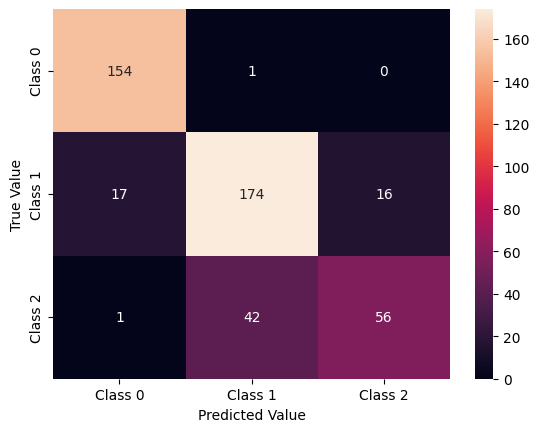


Classification Report:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       155
    straight       0.80      0.84      0.82       207
        turn       0.78      0.57      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.80      0.81       461
weighted avg       0.83      0.83      0.83       461



In [27]:
# TODO - Display confusion matrix and print classification reports
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1.Section 1 demonstrates better generalization since the test and validation scores are closer to the training score, and all scores are higher compared to Section 2. While Section 1 has a slightly higher training score, which could suggest mild overfitting, the closeness of the validation and test scores to the training score indicates that this overfitting is negligible. Therefore, the model in Section 1 is a better fit based on these evaluations. It achieves higher overall accuracy and generalizes effectively across the validation and test datasets without showing significant overfitting.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [28]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [29]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [32]:
# TODO - Print test score accuracies for test_set1 and test_set2

print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.82
test_set2 score: 0.82


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion Matrix:


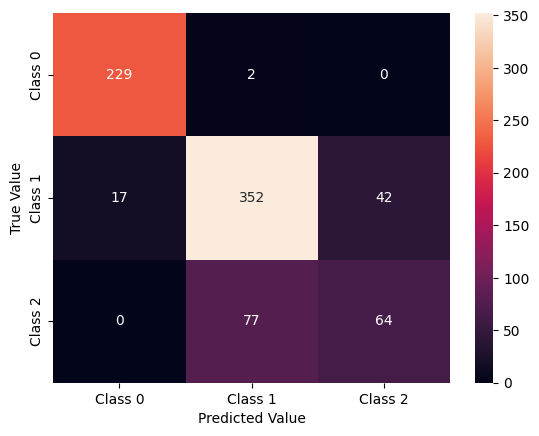


Classification Report:
              precision    recall  f1-score   support

        rest       0.93      0.99      0.96       231
    straight       0.82      0.86      0.84       411
        turn       0.60      0.45      0.52       141

    accuracy                           0.82       783
   macro avg       0.78      0.77      0.77       783
weighted avg       0.81      0.82      0.82       783



In [33]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y1_pred = grid.predict(X1)
conf_mat = confusion_matrix(y1, y1_pred)
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion Matrix:


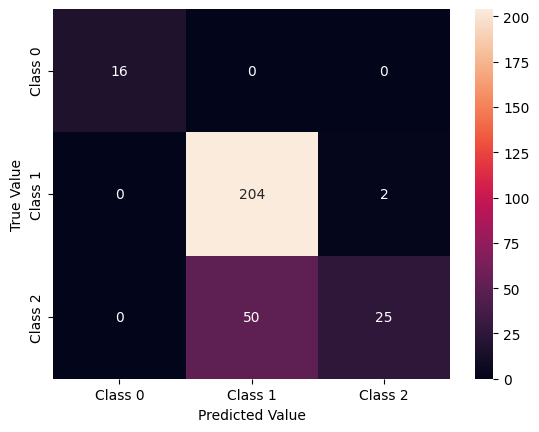


Classification Report:
              precision    recall  f1-score   support

        rest       1.00      1.00      1.00        16
    straight       0.80      0.99      0.89       206
        turn       0.93      0.33      0.49        75

    accuracy                           0.82       297
   macro avg       0.91      0.77      0.79       297
weighted avg       0.84      0.82      0.79       297



In [34]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y2_pred = grid.predict(X2)
conf_mat = confusion_matrix(y2, y2_pred)
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. The consistent performance across the training/validation and testing sets suggests that the model fits the data well. While it performs consistently accross all datasets, its scores are relatively low indicates that model might need some tuning.
2. For Section 1 both the cross-validation train score (0.95) and validation score (0.95) are very high, suggesting the model performs exceptionally well on the training and validation data.For Section 2 the cross-validation train (0.82) and validation scores (0.82) are lower than in Section 1 but consistent, indicating solid but less optimal performance compared to Section 1.
For Test scores Section 1t he primary test set score is high (0.96), aligning closely with the training and validation scores, suggesting good performance,but test_set1: A drop to 0.92 indicates slight overfitting to the training/validation data and test_set2: A significant drop to 0.25 suggests severe overfitting and poor generalization to highly different or challenging data. For Section 2: The primary test set score (0.83), test_set1 (0.82), and test_set2 (0.82) are consistent and close to the training/validation scores. This indicates better generalization across different datasets.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)

**Answer**
The selected features include variance, sum, and aggregate features, chosen for their physical relevance. Variance and aggregate features, in particular, capture essential aspects of motion and rotation, making them highly suitable for classifying motion states while ensuring data diversity and minimizing redundancy.


In [37]:
# TODO - Load group selected features from cv_set to X
X = cv_set[
    [
        'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
        'ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum',
        'a_sum', 'g_sum', 'a_var', 'g_var'
    ]
]
X.head(2)

,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,a_var,g_var
0,8.046094e-07,1.319665e-07,3.267073e-08,2.365611e-09,6.964705e-10,7.446916e-10,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,3.334598e-08,6.879234e-10
1,1.032619e-06,1.073067e-07,1.529967e-08,2.242613e-09,6.533136e-10,6.983481e-10,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.588712e-08,6.794409e-10


In [38]:
# TODO - Load motion_state column (target vector) into y
y =cv_set['motion_state']


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [39]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipe =  Pipeline([('scaler', StandardScaler()),
                  ('classifier', SVC())])
param_grid = {'scaler': [StandardScaler(), RobustScaler(), None],
              'classifier__C': [0.01, 0.1, 1, 10, 100],
              'classifier__gamma': [0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [41]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format((grid.best_score_)))
print("Best cross-validation validation score: {:.2f}".format(grid.score(X_test, y_test)))
y_pred = grid.predict(X_test)
print("Test-set score: {:.2f}".format(accuracy_score(y_test, y_pred)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'scaler': RobustScaler()}

Best cross-validation train score: 0.94
Best cross-validation validation score: 0.95
Test-set score: 0.95


Display the confusion matrix and print the classification report for the trained model using the *test* split.

Confusion Matrix:


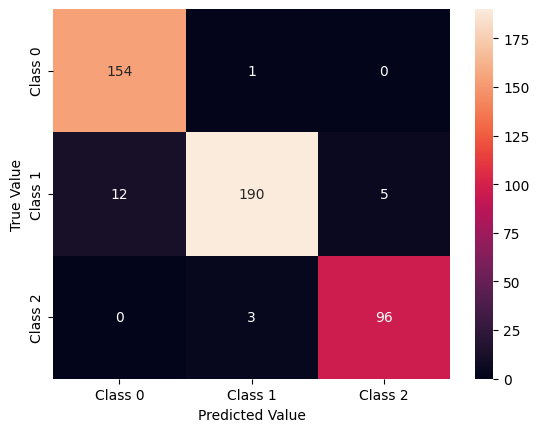


Classification Report:
              precision    recall  f1-score   support

        rest       0.93      0.99      0.96       155
    straight       0.98      0.92      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.95       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.95      0.95       461



In [42]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [43]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
group_selected_features = ['ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'a_var', 'g_var']
X1 = test_set1[group_selected_features]
X1.head(2)


,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,a_var,g_var
0,0.000001,7.749919e-08,3.920063e-08,3.655217e-09,6.507877e-10,7.727190e-10,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,3.437614e-08,1.003403e-09
1,0.000001,9.243000e-08,4.112300e-08,3.349120e-09,6.788807e-10,8.871433e-10,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,3.613404e-08,9.791644e-10


In [44]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[group_selected_features]
X2.head(2)

,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,a_var,g_var
0,0.000002,3.020959e-07,6.324738e-08,1.718706e-09,1.211633e-09,1.405038e-09,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,6.614559e-08,7.031396e-10
1,0.000003,6.859937e-07,3.110085e-07,2.179497e-09,1.893673e-09,1.164381e-09,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,3.344639e-07,9.305619e-10


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [45]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.82
test_set2 score: 0.69


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion Matrix:


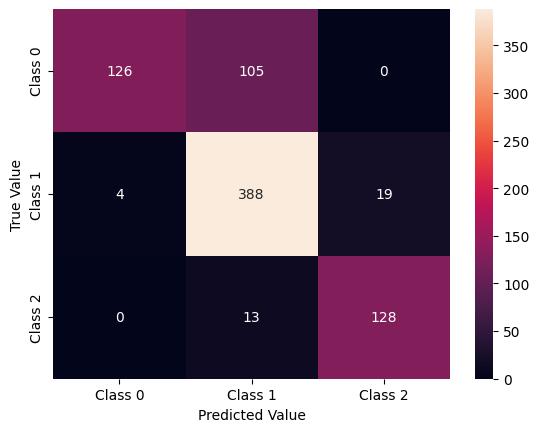


Classification Report:
              precision    recall  f1-score   support

        rest       0.97      0.55      0.70       231
    straight       0.77      0.94      0.85       411
        turn       0.87      0.91      0.89       141

    accuracy                           0.82       783
   macro avg       0.87      0.80      0.81       783
weighted avg       0.85      0.82      0.81       783



In [46]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y1, grid.predict(X1))
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y1, grid.predict(X1)))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion Matrix:


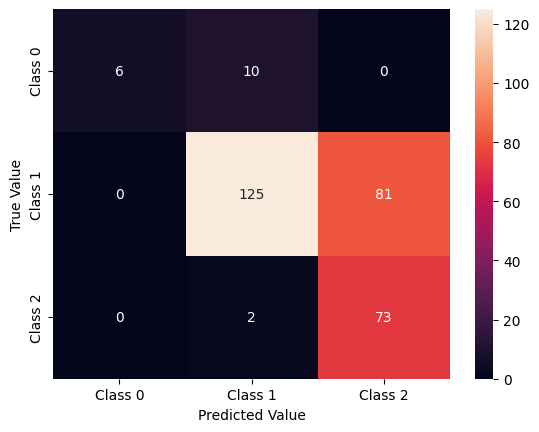


Classification Report:
              precision    recall  f1-score   support

        rest       1.00      0.38      0.55        16
    straight       0.91      0.61      0.73       206
        turn       0.47      0.97      0.64        75

    accuracy                           0.69       297
   macro avg       0.80      0.65      0.64       297
weighted avg       0.81      0.69      0.70       297



In [47]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y2, grid.predict(X2))
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y2, grid.predict(X2)))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1. Model Trained in Section 1 :

Section 1 model outperformed this model by slight margin amongst all metrics.

2. Model Trained in Section 2 :

This model shows significant improvement compared to the one in Section 2 across all metrics, particularly in cross-validation and test performance. This underscores the critical role of preprocessing, effective feature engineering, and high-quality data in developing high-performing models.


2

Section 3's model likely suffers from challenges such as noise, less effective feature selection, or class imbalance. In contrast, Sections 1 and 2 benefit from better preprocessing techniques and richer datasets. Additionally, differences in data complexity (e.g., overlapping classes or non-linear patterns) and cross-validation strategies may influence the generalizability of the models.



____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [48]:
# TODO - Load all features from cv_set to X
X =  cv_set.drop(columns=['motion_state'])
X.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [49]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [50]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [51]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC())
])


Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [52]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}


In [53]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [4, 7, 11, 14, 16],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [54]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.score(X_test, y_test)))
y_pred = grid.predict(X_test)
print("Test-set score: {:.2f}".format(accuracy_score(y_test, y_pred)))

Best params:
{'pca__n_components': 16, 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.94
Best cross-validation validation score: 0.94
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.

Confusion Matrix:


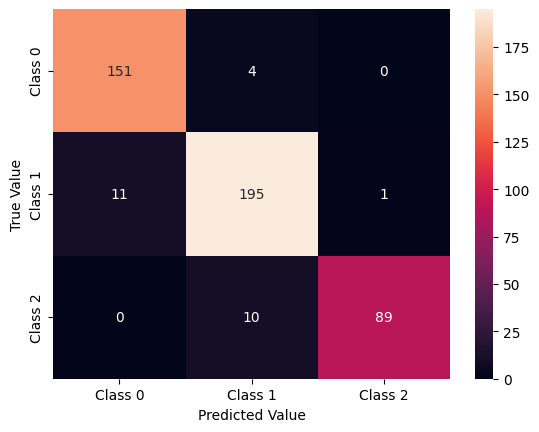


Classification Report:
              precision    recall  f1-score   support

        rest       0.93      0.97      0.95       155
    straight       0.93      0.94      0.94       207
        turn       0.99      0.90      0.94        99

    accuracy                           0.94       461
   macro avg       0.95      0.94      0.94       461
weighted avg       0.94      0.94      0.94       461



In [55]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [56]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [57]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [58]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))


test_set1 score: 0.91
test_set2 score: 0.40


Confusion Matrix:


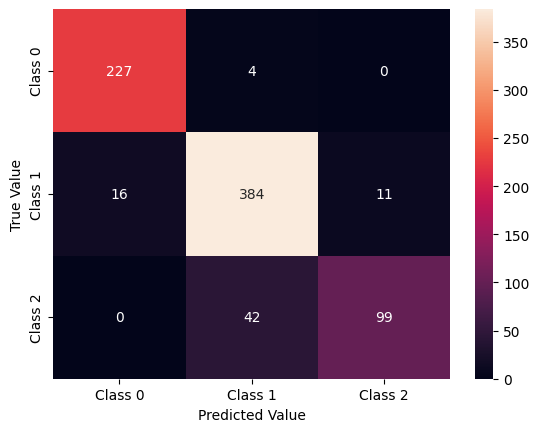


Classification Report:
              precision    recall  f1-score   support

        rest       0.93      0.98      0.96       231
    straight       0.89      0.93      0.91       411
        turn       0.90      0.70      0.79       141

    accuracy                           0.91       783
   macro avg       0.91      0.87      0.89       783
weighted avg       0.91      0.91      0.90       783



In [59]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y1, grid.predict(X1))
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y1, grid.predict(X1)))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion Matrix:


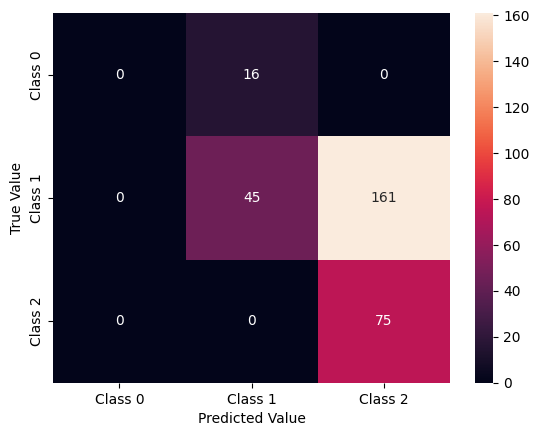


Classification Report:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.74      0.22      0.34       206
        turn       0.32      1.00      0.48        75

    accuracy                           0.40       297
   macro avg       0.35      0.41      0.27       297
weighted avg       0.59      0.40      0.36       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y2, grid.predict(X2))
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y2, grid.predict(X2)))


___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

1.  ____

Section 1: If simplicity and slightly better training performance are priorities, the model from Section 1 would be preferable. However, this model might be a better choice if dimensionality reduction through PCA aligns with future requirements.
Section 2: PCA appears to significantly enhance this model's performance by focusing on the most relevant features and reducing noise or redundancy. While both models show stability without notable overfitting, this model demonstrates slightly better learning and generalization.
Section 3: This model performs slightly better than the one from Section 3, mainly due to the inclusion of PCA, which improves generalization. The minor performance improvement indicates that PCA effectively reduces redundancy while preserving predictive capability.

2.    The performance differences across sections can largely be attributed to variations in data quality, preprocessing strategies, model tuning, and cross-validation setups. Section 3’s notably lower performance underscores the importance of resolving data issues and maintaining consistent preprocessing. In contrast, Section 4's improved results suggest more effective data handling or splitting strategies, while the use of PCA in Section 2 contributed to better generalization.






## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1. We have choosen Random Forest as our ML. The reson is that is easier to interpret as compared with others. Also it is inherently robust to overfitting due to its ensemble nature, even without extensive hyperparameter tuning.




In [61]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)


,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [62]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [63]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [64]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [65]:
# TODO - Define the parameter grid for your model
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
}

In [66]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [67]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.score(X_test, y_test)))
y_pred = grid.predict(X_test)
print("Test-set score: {:.2f}".format(accuracy_score(y_test, y_pred)))

Best params:
{'rf__max_depth': 30, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}

Best cross-validation train score: 0.85
Best cross-validation validation score: 0.85
Test-set score: 0.85


Display the confusion matrix and print the classification report for the trained model using the *test* split.

Confusion Matrix:


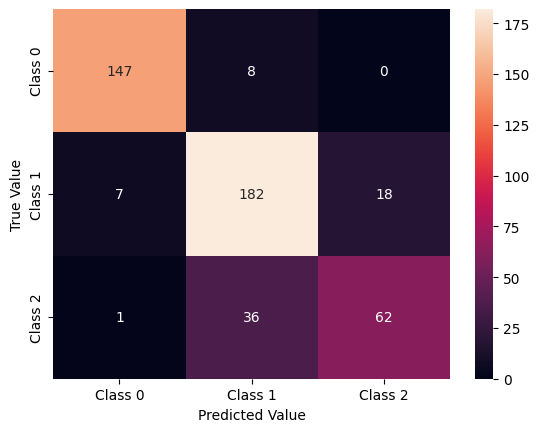


Classification Report:
              precision    recall  f1-score   support

        rest       0.97      0.98      0.97       517
    straight       0.87      0.93      0.90       689
        turn       0.89      0.73      0.80       328

    accuracy                           0.90      1534
   macro avg       0.91      0.88      0.89      1534
weighted avg       0.91      0.90      0.90      1534



In [68]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y, grid.predict(X)))


### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [69]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [70]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [71]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.84
test_set2 score: 0.71


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion Matrix:


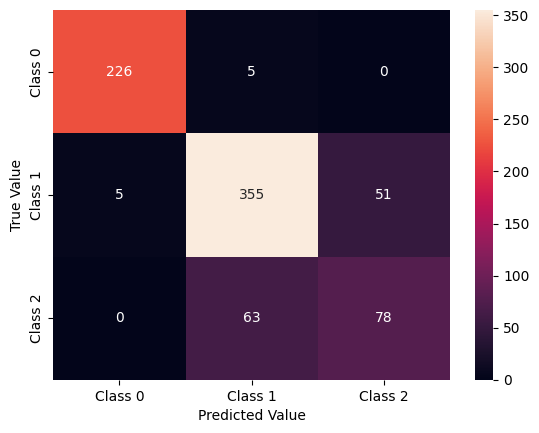


Classification Report:
              precision    recall  f1-score   support

        rest       0.98      0.98      0.98       231
    straight       0.84      0.86      0.85       411
        turn       0.60      0.55      0.58       141

    accuracy                           0.84       783
   macro avg       0.81      0.80      0.80       783
weighted avg       0.84      0.84      0.84       783



In [72]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y1, grid.predict(X1))
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y1, grid.predict(X1)))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion Matrix:


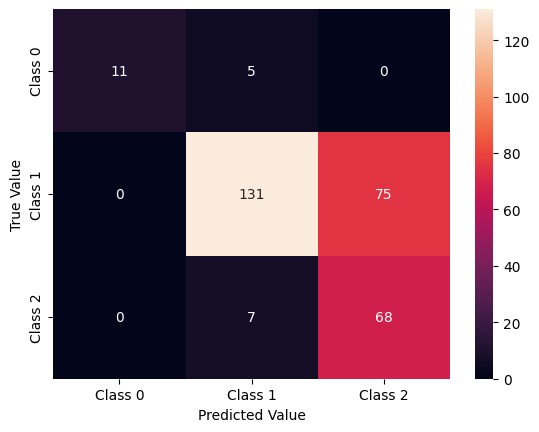


Classification Report:
              precision    recall  f1-score   support

        rest       1.00      0.69      0.81        16
    straight       0.92      0.64      0.75       206
        turn       0.48      0.91      0.62        75

    accuracy                           0.71       297
   macro avg       0.80      0.74      0.73       297
weighted avg       0.81      0.71      0.72       297



In [73]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y2, grid.predict(X2))
print("Confusion Matrix:")
sns.heatmap(conf_mat, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
print("\nClassification Report:")
print(classification_report(y2, grid.predict(X2)))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1. The model trained in section 5 outperforms section 2 for test set 1, but performs bad for test set 2.
For the better model fitting the SVC model from Section 2 fits better overall because it demonstrates more consistent performance across both test sets. While the Section 5 model achieves a marginally higher score on test_set1, its significant drop in performance on test_set2 indicates poorer generalization.
The discrepancies observed is Section 5 model may be overfitting to specific patterns in test_set1, leading to a lack of generalization to test_set2.If test_set2 has a slightly different data distribution or contains more noise, the Section 5 model may be more sensitive to these variations.While the Section 5 model has a slight edge on test_set1, the SVC model from Section 2 demonstrates better generalization and reliability, making it the preferred choice for overall performance.


____